# 1. Generate Data

In [1]:
import os
os.system("python3 build_os-mnist.py")

0

# 2. Load Data

load standard libraries

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

get tf-record parser

In [2]:
def _multimnist_parse_osmnist(example_proto):
    features = {
        "image_left": tf.FixedLenFeature([], tf.string),
        "image_right": tf.FixedLenFeature([], tf.string),
        "label1": tf.FixedLenFeature([], tf.int64),
        "label2": tf.FixedLenFeature([], tf.int64),
        "label3": tf.FixedLenFeature([], tf.int64),
        "occlusion_left": tf.FixedLenFeature([], tf.float32),
        "occlusion_right": tf.FixedLenFeature([], tf.float32),
        "occlusion_avg": tf.FixedLenFeature([], tf.float32),
        "segmap_left": tf.FixedLenFeature([], tf.string),
        "segmap_right": tf.FixedLenFeature([], tf.string),
      }
        

    parsed_features = tf.parse_single_example(example_proto, features)
    
    no_classes = 10
    one_hot = tf.one_hot(parsed_features["label1"], no_classes)
    
    occ1_one_hot = tf.one_hot(parsed_features["label2"], no_classes)
    occ2_one_hot = tf.one_hot(parsed_features["label3"], no_classes)
    n_hot = one_hot + occ1_one_hot + occ2_one_hot

    images_encoded_l =  parsed_features["image_left"]
    images_encoded_r =  parsed_features["image_right"]

    image_decoded_l = tf.image.decode_png(images_encoded_l)
    image_decoded_r = tf.image.decode_png(images_encoded_r)
    
    segmaps_encoded_l =  parsed_features["segmap_left"]
    segmaps_encoded_r =  parsed_features["segmap_right"]

    segmap_decoded_l = tf.image.decode_png(segmaps_encoded_l)
    segmap_decoded_r = tf.image.decode_png(segmaps_encoded_r)

    return image_decoded_l, image_decoded_r, segmap_decoded_l,\
        segmap_decoded_r, n_hot, one_hot, parsed_features["occlusion_left"], parsed_features["occlusion_avg"]


use parser to get to data

In [3]:
  ds = tf.data.TFRecordDataset('tfrecord_files/2occ/test/osmnist_test0.tfrecord')
  #ds = tf.data.TFRecordDataset('osfashionmnist/tfrecord_files/2occ/test/osfashionmnist_test0.tfrecord')

  ds = ds.map(_multimnist_parse_osmnist)

  iterator = ds.make_initializable_iterator()

  sess = tf.Session()
  sess.run(iterator.initializer)

W1007 10:45:49.975983 4532204992 deprecation.py:323] From <ipython-input-3-99f31dc038c9>:6: DatasetV1.make_initializable_iterator (from tensorflow.python.data.ops.dataset_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `for ... in dataset:` to iterate over a dataset. If using `tf.estimator`, return the `Dataset` object directly from your input function. As a last resort, you can use `tf.compat.v1.data.make_initializable_iterator(dataset)`.


# 3. Visualize Data

loop through data and use matplotlib to show its contents

In [25]:
batch = sess.run(iterator.get_next())
left_im = batch[0][:, :, 0]
right_im = batch[1][:, :, 0]
left_segmap = batch[2]
left_bin_segmap = batch[2][:, :, 0]
left_bin_segmap = left_bin_segmap > 0
left_bin_segmap = np.asarray(left_bin_segmap, dtype=int)
right_segmap = batch[3]
right_bin_segmap = batch[3][:, :, 0]
right_bin_segmap = right_bin_segmap > 0
right_bin_segmap = np.asarray(right_bin_segmap, dtype=int)
occlusion_left = batch[-2]
occlusion_avg = batch[-1]

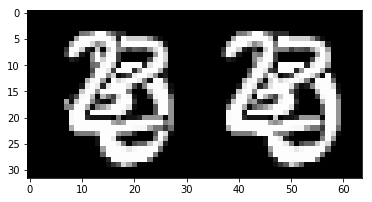

In [26]:
plt.imshow(np.concatenate([left_im, right_im], axis=1), cmap='gray')

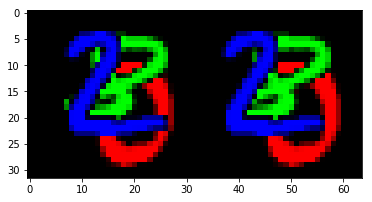

In [27]:
plt.imshow(np.concatenate([left_segmap, right_segmap], axis=1))

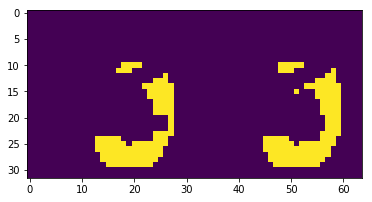

In [28]:
plt.imshow(np.concatenate([left_bin_segmap, right_bin_segmap], axis=1))

In [20]:
print('left occlusion: {}'.format(occlusion_left))
print('avg occlusion: {}'.format(occlusion_avg))

left occlusion: 0.5059523582458496
avg occlusion: 0.5952380895614624


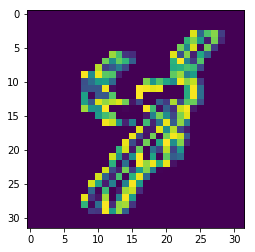

In [15]:
plt.imshow(left_im - right_im)